# Temperature Alignment: Simple Country Level Model #


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import TempAlign2 as TempAlign

<IPython.core.display.Javascript object>

## Obtaining Scenario Data ##

The NGFS have numerous open source scenarios aviailable that can be accessed via an API through an account or as an anonymous user. In addition to the different scenarios there are different models avaiable, though they may have different levels of detail in their output. The data can be displayed as time series similar to pandas dataframes.

In [3]:
data = TempAlign.WorldScenarios()

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.iiasa - INFO: You are connected as an anonymous user
pyam.iiasa - INFO: You are connected to the IXSE_NGFS_2 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


In [4]:
data.timeseries()

2000  \
model        scenario                                    region variable                                           unit                             
GCAM5.3_NGFS Below 2°C                                   World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.712351   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ/yr                      NaN   
             Current Policies                            World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.712351   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ/yr                      NaN   
             Delayed transition                          World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.712351   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ/yr                      NaN   
             Divergent Net Zero                          World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.712351   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ/yr                      NaN   
             Nationally Determined Contributions (NDCs)  World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.712351   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ/yr                      NaN   
             Net Zero 2050                               World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.712351   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ/yr                      NaN   

                                                                                                                                             2001  \
model        scenario                                    region variable                                           unit                             
GCAM5.3_NGFS Below 2°C                                   World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.738618   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ/yr                      NaN   
             Current Policies                            World  Diagnostics|Temperature|Global Mean|MAGICC6|Exp... °C rel. to 1850-1900  0.738618   
                                                                Emissions|Kyoto Gases                              Mt CO2-equiv/yr            NaN   
                                                                Final Energy                                       EJ

The most optimistic scenario is Net Zero resulting in only a 1.5 degree Centigrade rise in temperature since pre-industrial times, the most pessmistic scenario is 'business as usual', resulting in a nearly 4 degree Centigrade rise in temperature.

<AxesSubplot:title={'center':'model: GCAM5.3_NGFS - region: World - variable: Emissions|Kyoto Gases'}, xlabel='Year', ylabel='Mt CO2-equiv/yr'>

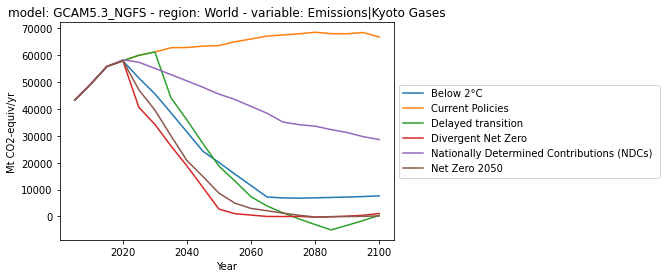

In [5]:
TempAlign.PlotScenarios(data)

<AxesSubplot:title={'center':'model: GCAM5.3_NGFS - region: World - variable: Diagnostics|Temperature|Global Mean|MAGICC6|Expected value'}, xlabel='Year', ylabel='°C rel. to 1850-1900'>

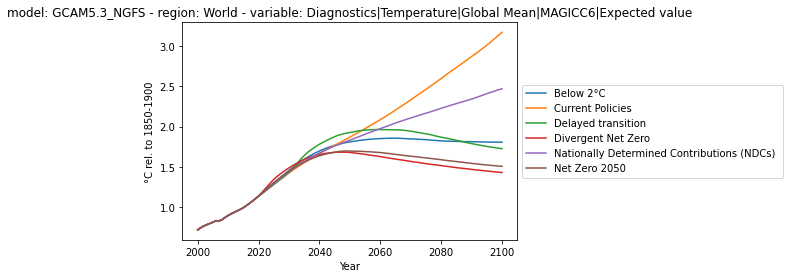

In [6]:
TempAlign.PlotScenarioTemperatures(data)

## Calculate the Current Carbon Intensity of each Country ##


In [7]:
CountryData = TempAlign.CarbonIntensities(2020)

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_2 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


In [8]:
CountryData

variable,region,Emissions|Kyoto Gases,Final Energy,ENinKWh,CO2inG,CIntensity
0,Afghanistan (downscaled),18.459497,0.311463,8.651763e+10,1.845950e+13,213.361099
1,Albania (downscaled),10.556482,0.104669,2.907468e+10,1.055648e+13,363.081644
2,Algeria (downscaled),223.382920,1.489679,4.137998e+11,2.233829e+14,539.833267
3,Angola (downscaled),104.447494,0.595192,1.653312e+11,1.044475e+14,631.746995
4,Argentina,517.786787,2.396579,6.657163e+11,5.177868e+14,777.788996
...,...,...,...,...,...,...
220,Viet Nam (downscaled),506.315178,3.152352,8.756533e+11,5.063152e+14,578.214199
221,World,57948.978180,405.167919,1.125466e+14,5.794898e+16,514.888547
222,Yemen (downscaled),199.741738,1.426096,3.961377e+11,1.997417e+14,504.222981
223,Zambia (downscaled),318.385983,0.410922,1.141451e+11,3.183860e+14,2789.309119


It is possible to have a negative carbon intensity owing to the 

In [9]:
Intensities = CountryData[['region','CIntensity']]
Intensities

variable,region,CIntensity
0,Afghanistan (downscaled),213.361099
1,Albania (downscaled),363.081644
2,Algeria (downscaled),539.833267
3,Angola (downscaled),631.746995
4,Argentina,777.788996
...,...,...
220,Viet Nam (downscaled),578.214199
221,World,514.888547
222,Yemen (downscaled),504.222981
223,Zambia (downscaled),2789.309119


array([[<AxesSubplot:title={'center':'CIntensity'}>]], dtype=object)

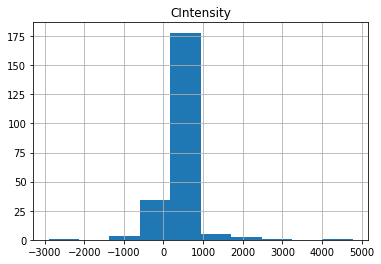

In [10]:
Intensities.hist()

In [11]:
Intensities.max()

variable
region        Zimbabwe (downscaled)
CIntensity              4781.491817
dtype: object

In [12]:
Intensities.min()

variable
region        Afghanistan (downscaled)
CIntensity                -2901.538095
dtype: object

# Calculate the alignment #

We get the final global temperatures and carbon intensities

In [13]:
t1 = TempAlign.GlobalCarbonIntensities(2050)

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_2 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


In [14]:
t2 = TempAlign.ScenarioTemperatures(data,2100)

In [15]:
t1 = t1.set_index('scenario')
t2 = t2.set_index('scenario')
t3 = t2.join(t1,how='left')
t3.columns = ['Final Temperature','Emissions|Kyoto Gases','Final Energy','ENinKWh','CO2inG','CIntensity2050']

In [16]:
t3

,Final Temperature,Emissions|Kyoto Gases,Final Energy,ENinKWh,CO2inG,CIntensity2050
scenario,,,,,,
Below 2°C,1.804816,20091.762270,435.874810,1.210763e+14,2.009176e+16,165.942933
Current Policies,3.174003,63585.543380,524.372708,1.456591e+14,6.358554e+16,436.536747
Delayed transition,1.723303,18723.933490,413.208415,1.147801e+14,1.872393e+16,163.128722
Divergent Net Zero,1.427271,2710.536269,360.664087,1.001845e+14,2.710536e+15,27.055454
Nationally Determined Contributions (NDCs),2.469716,45551.156450,485.297124,1.348048e+14,4.555116e+16,337.904667
Net Zero 2050,1.504140,8663.994330,396.138118,1.100384e+14,8.663994e+15,78.736123


In [17]:
t4 = t3[['CIntensity2050','Final Temperature']]

In [18]:
t4 = t4.sort_values(by=['Final Temperature'])

In [19]:
t4

,CIntensity2050,Final Temperature
scenario,,
Divergent Net Zero,27.055454,1.427271
Net Zero 2050,78.736123,1.504140
Delayed transition,163.128722,1.723303
Below 2°C,165.942933,1.804816
Nationally Determined Contributions (NDCs),337.904667,2.469716
Current Policies,436.536747,3.174003


Global temperature as a function of carbon intensity.

<AxesSubplot:xlabel='CIntensity2050'>

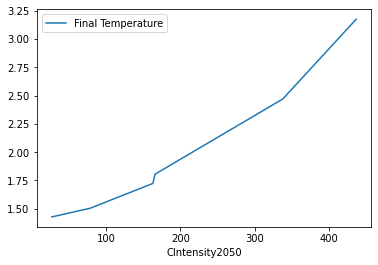

In [20]:
t4.plot(x='CIntensity2050',y='Final Temperature')

We want to interpolate so that if carbon intensity is above 436 we are aligned with 4 degrees

In [21]:
from scipy.interpolate import interp1d
def Alignment(CIntensity):
  f2 = interp1d(t4['CIntensity2050'], t4['Final Temperature'], kind='cubic')
  Thresh = t4['CIntensity2050'].iloc[5]
  LowTresh = t4['CIntensity2050'].iloc[0]
  if(CIntensity > Thresh):
    res = 4.0
  elif (CIntensity < LowTresh):
    res = t4['Final Temperature'].iloc[0]
  else: 
    res = float(f2(CIntensity))
  return res

In [23]:
IntensitiesInterp = Intensities.copy()

Temperature alignment - how does a country's current carbon intensity align to the global projected value for each of the scenarios

In [24]:
IntensitiesInterp.loc[:,'AligmentInterpolation'] = IntensitiesInterp['CIntensity'].apply(Alignment)

In [26]:
IntensitiesInterp

variable,region,CIntensity,AligmentInterpolation
0,Afghanistan (downscaled),213.361099,2.686408
1,Albania (downscaled),363.081644,2.414202
2,Algeria (downscaled),539.833267,4.000000
3,Angola (downscaled),631.746995,4.000000
4,Argentina,777.788996,4.000000
...,...,...,...
220,Viet Nam (downscaled),578.214199,4.000000
221,World,514.888547,4.000000
222,Yemen (downscaled),504.222981,4.000000
223,Zambia (downscaled),2789.309119,4.000000


In [27]:
Aligments2 = IntensitiesInterp[['region','AligmentInterpolation']]

Different countries have different alignments

array([[<AxesSubplot:title={'center':'AligmentInterpolation'}>]],
      dtype=object)

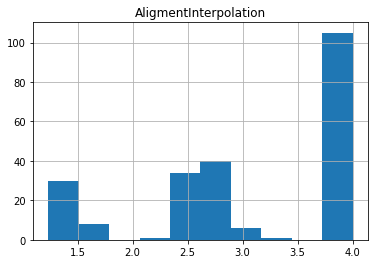

In [28]:
Aligments2.hist()

In [29]:
Aligments2[Aligments2['region'].str.contains('India',case=False)]

variable,region,AligmentInterpolation
79,GCAM5.3_NGFS|India,4.0
171,Republic of India,4.0


## Portfolio alignment ##

Using the weights of a Portfolio we can calculate it's carbon intensity:

In [30]:
Countries = ['United Kingdom (downscaled)','United States of America','Germany (downscaled)','France (downscaled)','People\'s Republic of China','Republic of India']

In [31]:
Issuers = Aligments2[Aligments2['region'].isin(Countries)]

In [32]:
Issuers

variable,region,AligmentInterpolation
60,France (downscaled),1.261681
97,Germany (downscaled),2.503187
163,People's Republic of China,4.000000
171,Republic of India,4.000000
212,United Kingdom (downscaled),2.820738
214,United States of America,2.449285


In [33]:
SubIntensities = Intensities[Intensities['region'].isin(Countries)]

In [34]:
#equal weighted portfolio
a = 1/6
weights = [a,a,a,a,a,a]

In [35]:
SubIntensities

variable,region,CIntensity
60,France (downscaled),134.339116
97,Germany (downscaled),330.203720
163,People's Republic of China,590.798209
171,Republic of India,586.848895
212,United Kingdom (downscaled),266.153622
214,United States of America,381.341517


In [36]:
import numpy as np
np.dot(3,4)
PortfolioCIntensity = np.dot(SubIntensities['CIntensity'],weights)

In [37]:
Alignment(PortfolioCIntensity)

2.4504175439506213